# Computer Lab 2: Variables, modules, Markdown, basic plots
Climate Data Analysis, ATS 301, Fall 2018					

Primary objective for today:
	Create temperature anomaly plot similar to the GISTEMP plot, using pre-downloaded GISTEMP data

Secondary objectives:
	Gain basic familiarity with Jupyter interface and Python: variables, functions, loading modules, Markdown cells.


## Pre-Lab

Start by logging on to the server (https://jupyter.coas.oregonstate.edu), and opening your pre-Lab 1 "notebook". 

You hopefully were able to calculate the effective blackbody temperature of the Earth:

<p style="text-align:center;">$S(1-\alpha)=\sigma T^4$
<p>

•	Where S is the solar constant (340 Wm$^{-2}$)

•	α is the planetary albedo (0.3)

•	σ is the Stephan-Boltzman contant (5.67 x 10$^{-8}$ Wm$^{-2}$K$^{-4}$)

•	and T is the effective blackbody temperature (in K). 

(You may find it helpful that you can take the nth root of something using exponentiation to the 1/n power.)

If you were not able to do this calculation, we will go over it now.    

## Pre-Lab: Variables

Say you wanted to calculate T for a whole bunch of different values of the solar constant and albedo. Rather than copying and pasting the previous line, or retyping, the better way is to use *variables*. By assigning a *value* to a variable, you can use it again later. This also ensures that the same value is used for a variable everywhere in your code. You only have to change it in one place, and then it’s the same everywhere when you re-run the code.  Otherwise, you may accidently use the old value somewhere.

There are different conventions for naming variables. I prefer descriptive words, separated by underscores. <b>You cannot use spaces in a variable name.</b> 


In [1]:
solar_constant=340

In [2]:
albedo=0.3

Notice that there is no output this time. That is because the interpreter is doing *assignment* rather than *evaluation*. (See *Think Python* for an explanation of this.) 

Now we can use these variables to calculate the absorbed solar radiation.


In [3]:
solar_constant * (1-albedo)

237.99999999999997

Now you’ve calculated the absorbed solar radiation. **Compare your answer with your neighbor before moving on.** 

You don’t have to enter in all of the commands one line at a time (in fact, you normally don’t want to). You can keep adding lines to the cell until you press 'shift-enter'.


In [4]:
new_solar=342
new_solar*(1-albedo)

239.39999999999998

Here, you’ve calculated the absorbed solar radiation for a slightly brighter sun. Notice that the value of `albedo` is the same. Actually, `solar_constant` is the same as well, since you haven’t changed that either. You can reassign a value to a variable using “`=`” again. Here I’ll increase the solar constant yet again.


In [7]:
print(new_solar)
new_solar*(1-albedo)

344


240.79999999999998

One thing to note here is that if you want to output the values from lines before the last one is that you need to use a *`print` command* to output this. See the discussion of *interactive* vs *script mode* in *Think Python*.

Here, I use `print` statements to check on the values of the two different solar constant variables. Before you run this cell, write down what you expect the output to be.


In [9]:
new_solar=346
print(new_solar)
print(solar_constant)
new_solar*(1-albedo)
albedo

346
340


0.3

<b>To do</b>: Given the 0-D energy balance model, calculate the effective temperature based on a solar constant of 340 Wm$^{-2}$, albedo of 0.3, but this time, use variable names for everything. 

In [ ]:
####### your code goes here #######

## Python functions

Python can do more than math operations. Say you wanted to calculate the absolute value of something. Try this:

In [1]:
abs(-0.5)

0.5

In [3]:
abs_point_five=abs(0.5)

`abs` is a *function*.  You already knew one function (`print`), and now you know two. Functions take *arguments* as *input*, and *return* a value (or values, as we’ll see later). In this case, Some functions take more than one argument, and some allow you to specify optional arguments. 

The `abs` function, as used above, is not very interesting, since you already know the answer. However, when we combine functions with *variables*, they become much more valuable.

Say you wanted to calculate the absolute value for a whole bunch of different numbers. Rather than copying and pasting the previous line, or retyping, the better way is to use variables. Since a common quantity of interest in in climate is a temperature change, let’s create a new temperature change variable:



In [4]:
temp_change = 0.5
print(temp_change)

0.5


Now, whenever you use temp_change in your code, python will replace it with whatever value you last set it to. (Note: it will use the last value, which is not always what you intend it to use. If your code gets long (later on in the class), use a `print` statement to verify the value is what you think it is.) 

Now, use this variable in the `abs` function:


In [5]:
abs(temp_change)

0.5

Try with a different temp_change value:


In [6]:
temp_change = -0.7
abs(temp_change)

0.7

While this doesn’t seem like it is any more efficient right now, it will become more useful when you have multiple calculations in a row.

## Save your work

Now would be a good time to save your work.

Go to the "File" menu and select "Save and Checkpoint", or click on the disk icon in the toolbar.  You should do this often.

## Python modules

The base Python includes only a few _functions_ by default. `abs` is an example of a built-in Python function. It takes a value (`temp_change` in our case) and returns the absolute value. But basic Python does not include many built-in functions.

To extend the functionality of Python, we use _modules_. Modules are files that have predefined functions that you can _import_ into and use in Python.  This allows for great customization of Python, but it can be challenging sometimes when you are trying to find a particular function, and don’t remember which module it’s in. I recommend keeping a “cheat sheet” of functions you often use, so you can refer back to it to remember how to do certain calculations or plots.

Some common modules we’ll use in this class are `matplotlib`, which includes basic plotting commands and is intended to be similar to Matlab, and `numpy`, which allows us to do neat things with multi-dimension arrays. In the spirit of continuing to jump into the deep end, today we’ll just start using them, and talk about what they actually do later.


First, we need to _import_ the modules. Actually, **before** importing the `matplotlib` functions, we use the `%matplotlib inline` command to tell Jupyter to include the plots _inline_ on this web interface, rather than as a separate window. <span style="color:red">**If you use a matplotlib function before you run this command, you will need to rewrite your code and "restart and rerun" the kernel to get inline plotting to work.**</span>

The first `import` command imports the `pyplot` subset of functions from the `matplotlib` module. To simpify our code, we are giving these functions the nickname of `plt`. (Otherwise, we would have to write `matplotlib.pyplot` every place you see `plt` below.)

We are also importing the `numpy` module, shortening the name to `np` so that we don't have to type the three extra characters. Programmers are lazy.


In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In general, it's a good idea to import all of the modules you need for a particular notebook in the very first code cell of the notebook. 

## Our first look at the GISTEMP Data

Next week, you will learn how to read in data from a file and save it in variables. But, today, we just want to make a quick plot so that we have something pretty to look at this first lab.  So I have already extracted the variables for you. 

The following command "runs" the Python code to get this data. The code is in the `/Data/ATS_301/Share/` directory, rather than your home directory, so we have to tell the computer exactly where it is.

After the command runs, you will have the data stored in the variables `glob_ann_gistemp` (global annual average temperature anomaly) and `gistemp_year` (corresponding year for each anomaly). These are a special type of variable called an *array*, which we'll learn more about next week.


In [8]:
%run /data/ATS_301/Share/Gistemp.ipynb

Let's look at all the year values, just to make sure they look reasonable. Normally, you wouldn't want to look at all the data, since it would be too long, but let's try it just this once.

In [9]:
print(gistemp_year)

[1880. 1881. 1882. 1883. 1884. 1885. 1886. 1887. 1888. 1889. 1890. 1891.
 1892. 1893. 1894. 1895. 1896. 1897. 1898. 1899. 1900. 1901. 1902. 1903.
 1904. 1905. 1906. 1907. 1908. 1909. 1910. 1911. 1912. 1913. 1914. 1915.
 1916. 1917. 1918. 1919. 1920. 1921. 1922. 1923. 1924. 1925. 1926. 1927.
 1928. 1929. 1930. 1931. 1932. 1933. 1934. 1935. 1936. 1937. 1938. 1939.
 1940. 1941. 1942. 1943. 1944. 1945. 1946. 1947. 1948. 1949. 1950. 1951.
 1952. 1953. 1954. 1955. 1956. 1957. 1958. 1959. 1960. 1961. 1962. 1963.
 1964. 1965. 1966. 1967. 1968. 1969. 1970. 1971. 1972. 1973. 1974. 1975.
 1976. 1977. 1978. 1979. 1980. 1981. 1982. 1983. 1984. 1985. 1986. 1987.
 1988. 1989. 1990. 1991. 1992. 1993. 1994. 1995. 1996. 1997. 1998. 1999.
 2000. 2001. 2002. 2003. 2004. 2005. 2006. 2007. 2008. 2009. 2010. 2011.
 2012. 2013. 2014. 2015. 2016. 2017.]


In [10]:
print(glob_ann_gistemp)

[-0.18 -0.09 -0.1  -0.19 -0.29 -0.31 -0.32 -0.34 -0.18 -0.11 -0.37 -0.24
 -0.27 -0.32 -0.31 -0.22 -0.11 -0.12 -0.28 -0.18 -0.09 -0.15 -0.3  -0.39
 -0.49 -0.29 -0.22 -0.39 -0.43 -0.47 -0.43 -0.43 -0.35 -0.35 -0.15 -0.12
 -0.33 -0.44 -0.28 -0.26 -0.25 -0.17 -0.27 -0.24 -0.25 -0.2  -0.09 -0.2
 -0.19 -0.35 -0.14 -0.1  -0.17 -0.3  -0.14 -0.21 -0.16 -0.04 -0.03 -0.03
  0.12  0.18  0.06  0.07  0.21  0.09 -0.07 -0.04 -0.1  -0.11 -0.18 -0.06
  0.01  0.07 -0.15 -0.15 -0.21  0.04  0.07  0.03 -0.02  0.06  0.04  0.07
 -0.2  -0.1  -0.05 -0.02 -0.08  0.07  0.03 -0.09  0.01  0.16 -0.08 -0.01
 -0.11  0.17  0.06  0.16  0.27  0.33  0.13  0.31  0.16  0.12  0.18  0.33
  0.41  0.29  0.44  0.41  0.22  0.24  0.31  0.45  0.34  0.47  0.62  0.4
  0.4   0.54  0.63  0.61  0.54  0.67  0.62  0.64  0.51  0.63  0.7   0.58
  0.61  0.64  0.73  0.87  0.99  0.89]


When you use a new dataset, it's always a good idea to do some sanity checks before using it. Let's start by exploring some basic aspects of the array. The function `np.shape` will tell you the size of a numpy array.

In [11]:
np.shape(glob_ann_gistemp)

(138,)

Since the array is 1-D, the first number (the length of the array) is followed by a comma and nothing else. If the array had multiple dimensions, there would be additional numbers here.

Verify that the size of the year array is the same before moving on.

In [12]:
# Your code goes here.

np.shape(gistemp_year)

(138,)

Based on what you already know (in this case, you can see the final plot you’re trying to make, but generally you’ll have to use rely more on your own background knowledge) what do you expect the maxumim and minimum values to be, approximately? Add a *Markdown cell* with your rough estimate before continuing.

**To add a Markdown cell**, start in a new cell, go to the pull-down menu that says "Code", and switch it to "Markdown". Now, you can just type in plain text. When you run the cell, it converts it to text like you see here.

Hello, world.

### Add your Markdown cell here

Based on the plot shown in class, I expect the maximum value to be about XXXXX.

Don't forget to include the units.

Now calculate the actual max and min temp anomalies to verify they're about what you expect. The `min` and `max` functions do what you would expect:

In [13]:
max(glob_ann_gistemp)

0.99

In [14]:
min(glob_ann_gistemp)

-0.49

## Plotting

Now you are ready to make your first plot, using the `matplotlib` module.

http://matplotlib.org/users/pyplot_tutorial.html provides an introduction to basic plotting using these `pyplot` functions. You can also check out the matplotlib documentation through the Help menu in the menu bar.

The basic command to plot an x-y plot (scatterplot or line plot) is `plt.plot`. The `plt` part at the beginning of the functions tells us that we are using functions from the `matplotlib` module called `pyplot` (which we imported in an earlier step). 

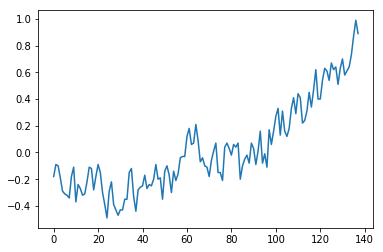

In [15]:
plt.plot(glob_ann_gistemp)

What is plotted on the x axis? What is on the y axis?

Since we didn't specify values to use for the x-axis, Python just used the _index_ associated with each temperature anomaly data point for the plot. However, we know what the year values are, so we can include them explictly.

Redo this plot to show time on the x axis, rather index, by using a different form of the `plot` command. Rather than one _argument_, this one takes two. The first is the list of x values for each point. The second is the list of y values for each point. (If the lists are different lengths, you will get an error.)

So the plot command become


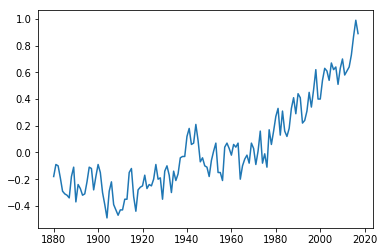

In [16]:
plt.plot(gistemp_year,glob_ann_gistemp)

We need to add labels to our plot. `plt.xlabel`, `plt.ylabel`, and `plt.title` add the specified text to the axes and title. The title is a little long, so we'll change the font size. Try this cell with a larger or smaller `size` to see what happens.

Text(0.5,1,'Global Mean Estimates based on Land and Ocean Data (GISTEMP)')

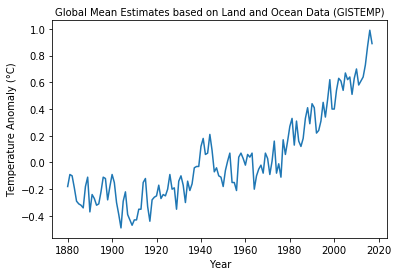

In [17]:
plt.plot(gistemp_year,glob_ann_gistemp)
plt.ylabel("Temperature Anomaly (°C)")
plt.xlabel("Year")
plt.title("Global Mean Estimates based on Land and Ocean Data (GISTEMP)",size=10)

The plot we are trying to replicate uses black markers for the data points. How do we do this?

The `plt.plot` function has many options. To see what these are, we use the `help` command. The `help` command will be one of your greatest friends this term. It will provide you with all sorts of information about how to use various functions.


In [18]:
help(plt.plot)

Help on function plot in module matplotlib.pyplot:

plot(*args, **kwargs)
    Plot y versus x as lines and/or markers.
    
    Call signatures::
    
        plot([x], y, [fmt], data=None, **kwargs)
        plot([x], y, [fmt], [x2], y2, [fmt2], ..., **kwargs)
    
    The coordinates of the points or line nodes are given by *x*, *y*.
    
    The optional parameter *fmt* is a convenient way for defining basic
    formatting like color, marker and linestyle. It's a shortcut string
    notation described in the *Notes* section below.
    
    >>> plot(x, y)        # plot x and y using default line style and color
    >>> plot(x, y, 'bo')  # plot x and y using blue circle markers
    >>> plot(y)           # plot y using x as index array 0..N-1
    >>> plot(y, 'r+')     # ditto, but with red plusses
    
    You can use `.Line2D` properties as keyword arguments for more
    control on the  appearance. Line properties and *fmt* can be mixed.
    The following two calls yield identical resu

Click on the side of the cell to toggle between scrolling and non-scrolling, since this command results in lots of output.

Based on the output from the help command, work with your partner to figure out which options to use in the `plt.plot` command to create the plot with black markers and line rather than a blue line. 

In [ ]:
plt.plot(gistemp_year,glob_ann_gistemp,###### put the correct options here #######)
plt.ylabel("Temperature Anomaly (°C)")
plt.xlabel("Year")
plt.title("Global Mean Estimates based on Land and Ocean Data (GISTEMP)",size=10)
         

Text(0.5,1,'Global Mean Estimates based on Land and Ocean Data (GISTEMP)')

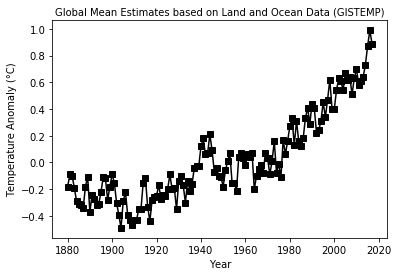

In [19]:
#

plt.plot(gistemp_year,glob_ann_gistemp,'ks-')
plt.ylabel("Temperature Anomaly (°C)")
plt.xlabel("Year")
plt.title("Global Mean Estimates based on Land and Ocean Data (GISTEMP)",size=10)
       

## Turning in lab notebook


1. Go to "File" -> "Save and Checkpoint" to save your lab notebook.

2. Go to "File" -> "Close and Halt". The notebook tab will close, and you will be back on the directory web page. 

3. Click the box next to the notebook file.

4. Click "duplicate", so that you can save a copy in your home directory.

5. Click the box next to the notebook file again.

6. Click the "move" button.

7. Type "data/ATS_301/Labs/Lab01".


## For more info


http://matplotlib.org/users/pyplot_tutorial.html provides an introduction to basic plotting using this pyplot functions.
